In [ ]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [ ]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.001, 0.04) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short #* seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.176, 0.230) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        #period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long #* seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)
local_variation_lengthscale = gpytorch.priors.GammaPrior(1, 0.05)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha
local_variation.lengthscale = local_variation_lengthscale

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
    )
)


covar_module = local_variation #+ local_variation_2

In [30]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('uv_sigma_line_eg_30T', 30, True)

In [ ]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='uv_sigma_line_eg',
    update_score=False
)   

In [ ]:
mse, mape

## 15 minutes

In [85]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('uv_sigma_line_eg_15T', 15, True)

In [86]:
period_constraint_short1 = gpytorch.constraints.Interval(0.01145, 0.01146)
per1 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short1)
period_constraint_short2 = gpytorch.constraints.Interval(0.01354, 0.01355)
per2 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short2)
period_constraint_short3 = gpytorch.constraints.Interval(0.01562, 0.01563)
per3 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short3)

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        #period_length_constraint=period_constraint_short
        )
    )

covar_module = gpytorch.kernels.ScaleKernel(per1 + per2 + per3) + local_variation

Iter 1 , Loss = 1.4433033485649256 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.374456749870094 , Noise = 0.6882597208023071
Iter 3 , Loss = 1.393492659964631 , Noise = 0.6837893724441528
Iter 4 , Loss = 1.399082609381554 , Noise = 0.6791625022888184
Iter 5 , Loss = 1.406291612030671 , Noise = 0.6744959950447083
Iter 6 , Loss = 1.398194242881447 , Noise = 0.6698428988456726
Iter 7 , Loss = 1.3941305220390883 , Noise = 0.6651841998100281
Iter 8 , Loss = 1.3927504715836394 , Noise = 0.6605348587036133
Iter 9 , Loss = 1.406414541282156 , Noise = 0.6559236645698547
Iter 10 , Loss = 1.3924229378640913 , Noise = 0.6514288187026978
Iter 11 , Loss = 1.3971139728134419 , Noise = 0.6469655632972717
Iter 12 , Loss = 1.4191968394022085 , Noise = 0.6425541639328003
Iter 13 , Loss = 1.4286993540675732 , Noise = 0.6383669972419739
Iter 14 , Loss = 1.4299312455627375 , Noise = 0.6344841122627258
Iter 15 , Loss = 1.4179280246173642 , Noise = 0.6309077143669128
Iter 16 , Loss = 1.3988151388173324 , No

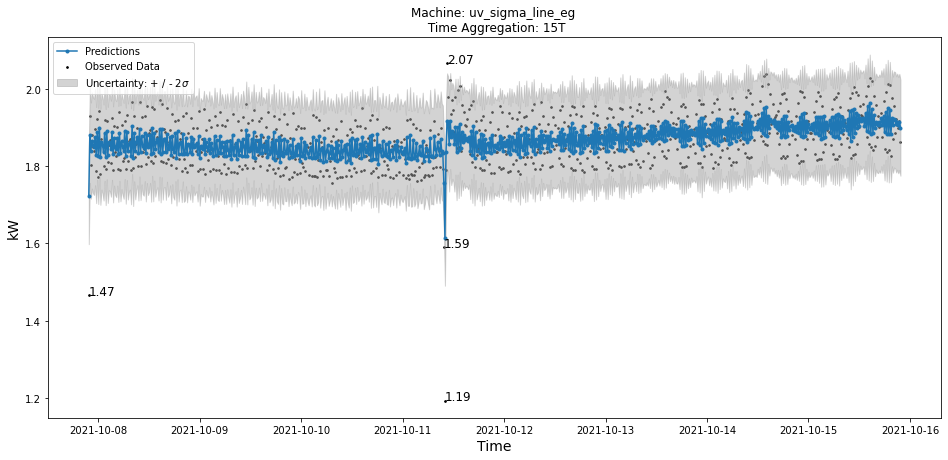

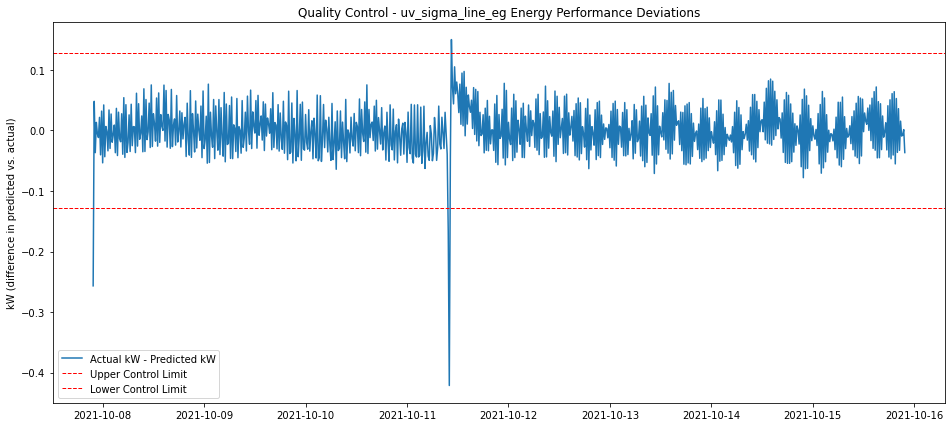

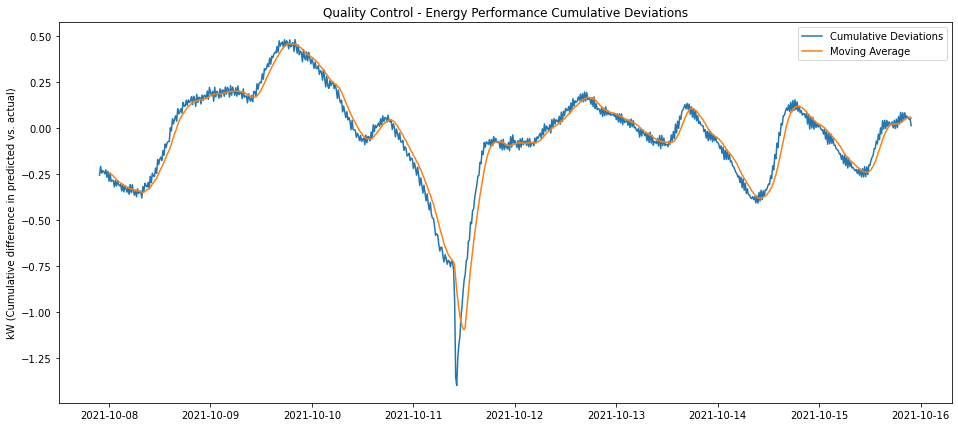

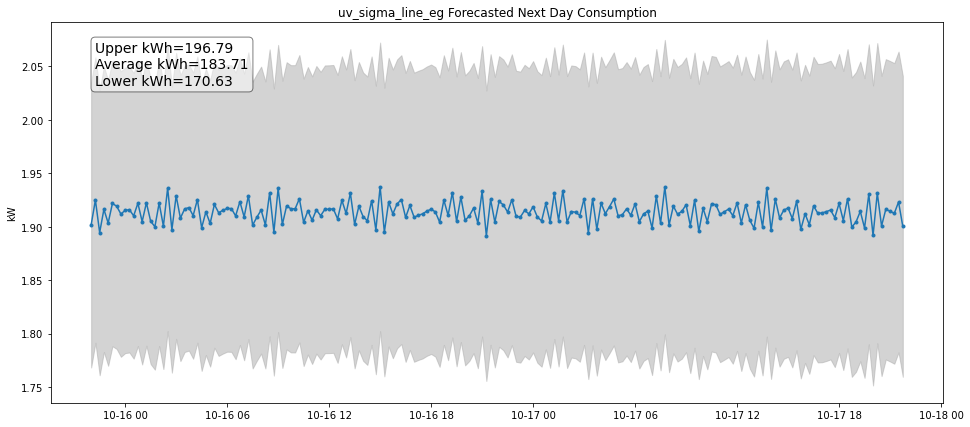

In [87]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    lr=0.01,
    training_iter=100,
    time_agg='15T',
    machine='uv_sigma_line_eg',
    update_score=False
)   

In [88]:
mse, mape

(0.0038472043848454284, 0.028210532105307374)